# Hypothesis Testing with Insurance Data (Core)

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

1) State your Null Hypothesis and Alternative Hypothesis
2) Select the correct test according to the data type and number of samples
3) Test the assumptions of your selected test.
4) Execute the selected test, or the alternative test (if you do not meet the assumptions)
5) Interpret your p-value and reject or fail to reject your null hypothesis 
6) Show a supporting visualization that helps display the result

In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Q1. Do smokers have higher insurance charges than non-smokers?


### Choose Independent t-test (2-sample)

Assumptions: 
- No significant outliers
- Normality
- Equal Variance

We will test at the significance value of .05

### Hypotheses

Null Hypothesis:  Smokers and non-smokers have equal insurance charges

Alternative Hypothesis: Smokers and non-smokers do not have equal insurance charges


In [3]:
# Read in the data

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# see how many with and without strength
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
#Split data into two groups

# Filtering out those with and without super strength
smoker_df = df.loc[df['smoker']== "yes"].copy()
non_smoker_df = df.loc[df['smoker']== "no"].copy()

In [7]:
# Define our feature of interest

smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']

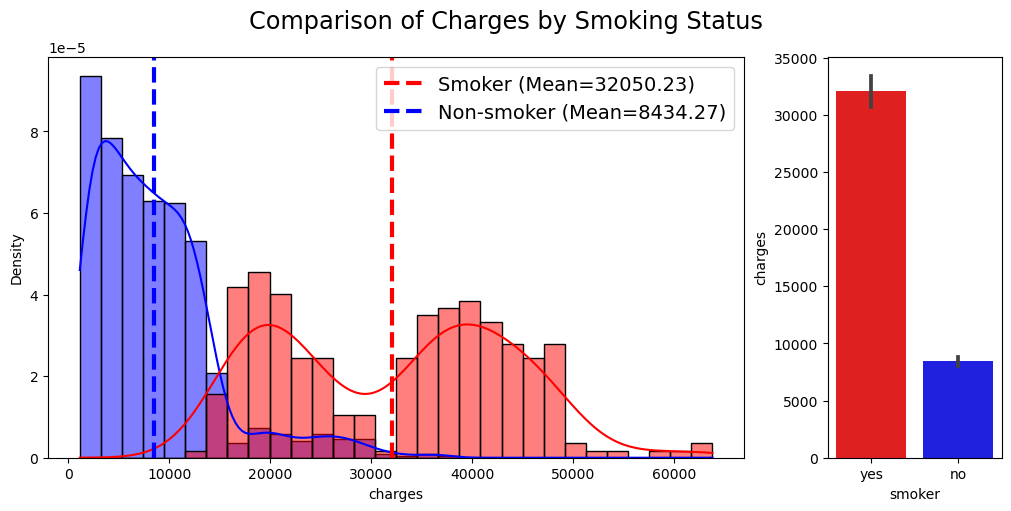

In [15]:
color_palette={'yes':'Red', 'no':'Blue'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=color_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(smoker_charges):.2f})",color=color_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-smoker (Mean={np.mean(non_smoker_charges):.2f})",color=color_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=color_palette)
fig.suptitle('Comparison of Charges by Smoking Status',fontsize='xx-large');

## Check for outliers

In [16]:
# Check for outliers in weight for smoker group
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [17]:
# Check for outliers in weight for strength group
zscores= stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [20]:
# We will remove the outlier from the non_smoker_charges group.
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

## Check for normalcy

In [23]:
# Check for Normality

# test the strength group for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [24]:
# Check for Normality

# test the strength group for normality
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

As is clear from the graph, neither set of data is normal.  However as here are more than 15 data points in each group we will go ahead with the analysis.

In [25]:
# Check for Equal Variance

# Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

We don't have equal variances. We will include "equal_var = False" when we perform our t-test.

In [27]:
# Perform and evaluate the t-test

# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

## Conclusion to question 1

The pvalue is significantly lower than our chosen alpha of .05.  We will therefore reject the null hypothesis that the charges are equal between smokers and non-smokers.

# Q2. Are men more likely to smoke than women?


### Chi-Square test
- There are two categorical variables (nominal)
- The outcomes are independent

### Hypotheses
Null Hypothesis: Men and women are equally likely to smoke

Alternative Hypothesis: Men and women have different rates of smoking

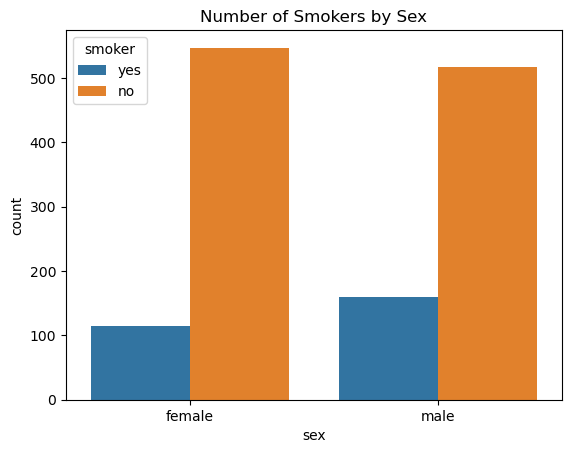

In [32]:
# First, let's visualize smoking by sex

ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [34]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [35]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [36]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

## Conclusion to question 2

The p-value is less than 0.05, so we have a significant result.

Since our p < .05, we reject the null hypothesis that there is no relationship between a person's sex and if they smoke.

This means that we accept the alternate hypothesis and conclude that there is a relationship between a person's sex and if they smoke.

## Q3. Do different regions have different charges, on average?


### One Way ANOVA
- No significant outliers
- Equal variance
- Normality

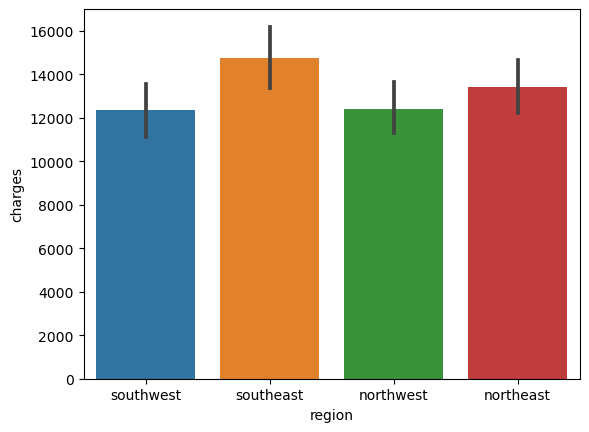

In [37]:
sns.barplot(data=df, x='region',y='charges');

### Hypothesis 

Null Hypothesis: Different regions all have the same charges.

Alternative Hypothesis: Different regions have different charges.

Using an alpha=.05

